In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller
%matplotlib inline 
import seaborn as sns 
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')
from math import sqrt
import plotly.express as px
from scipy.stats import boxcox
import plotly.graph_objects as go
from pandas.plotting import lag_plot
import statsmodels.formula.api as smf 
from plotly.subplots import make_subplots
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing


In [2]:
df=pd.read_csv('reliance_stock_data.csv',header=0)

In [3]:
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,33.917892,35.945827,33.917892,35.945827,26.684874,31204789
1,2000-01-04,36.902668,38.823490,35.888702,38.823490,28.821140,66436055
2,2000-01-05,36.652744,41.115627,36.652744,40.344440,29.950237,187894923
3,2000-01-06,41.272720,42.943623,41.272720,42.036766,31.206556,109810562
4,2000-01-07,42.129593,45.399994,41.843967,44.921570,33.348129,139140630


# EDA 

### Basic info about the data 

In [4]:

df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,6065.000000,6065.000000,6065.000000,6065.000000,6065.000000,6.065000e+03
mean,687.817629,695.656793,679.426883,687.249539,664.113475,1.760298e+07
std,742.097607,749.185969,734.674802,741.697765,744.838929,1.927623e+07
min,29.347902,31.347273,28.155420,29.019436,21.542965,0.000000e+00
25%,114.249748,116.163429,113.435715,115.199448,99.916748,6.600254e+06
50%,431.565033,437.028168,425.164703,431.519318,396.234375,1.053300e+07
75%,851.243774,859.472778,842.649048,850.832336,828.190430,2.120685e+07
max,3011.550049,3024.899902,2974.449951,3014.800049,3014.800049,3.161448e+08


In [5]:
# coverting the object column as datetime
df['Date']=pd.to_datetime(df['Date'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6065 entries, 0 to 6064
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       6065 non-null   datetime64[ns]
 1   Open       6065 non-null   float64       
 2   High       6065 non-null   float64       
 3   Low        6065 non-null   float64       
 4   Close      6065 non-null   float64       
 5   Adj Close  6065 non-null   float64       
 6   Volume     6065 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 331.8 KB


### Checking if there's any null values

In [7]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

## Using the "Date" and "Closing price" column in further process

In [8]:
close_price=df[['Date','Close']]
close_price.shape


(6065, 2)

In [9]:
close_price.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6065 entries, 0 to 6064
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    6065 non-null   datetime64[ns]
 1   Close   6065 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 94.9 KB


## setting the 'date' column as an index

In [10]:
close_price=close_price.set_index('Date')
close_price.head()

,Close
Date,
2000-01-03,35.945827
2000-01-04,38.823490
2000-01-05,40.344440
2000-01-06,42.036766
2000-01-07,44.921570


In [11]:
y=close_price['Close'].resample('d').mean()
print(y.shape)
y.dropna(inplace=True)


(8878,)


# Line Plot 

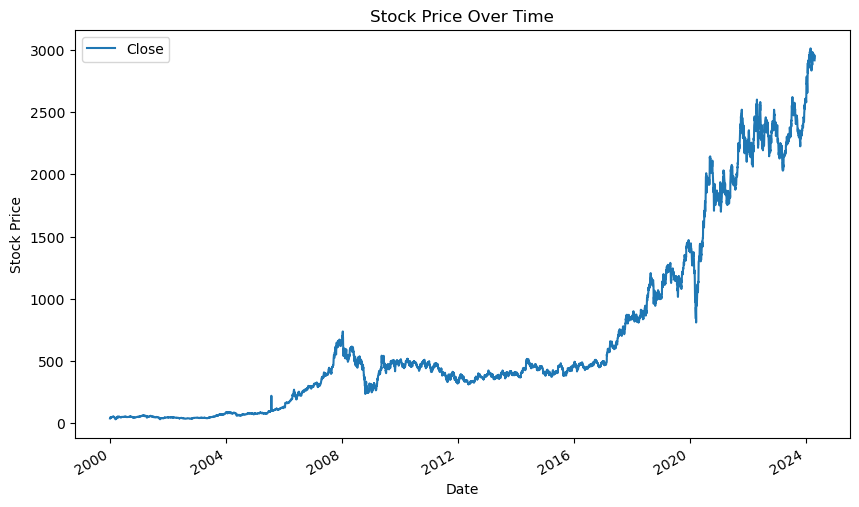

In [12]:
y.plot(figsize=(10,6),)
plt.title('Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

1. As we can see that the closing prices follows an  upward trend 
2. it dropped somewhere around Q1 of 2020 
3. But then saw a significant rise 

<Axes: >

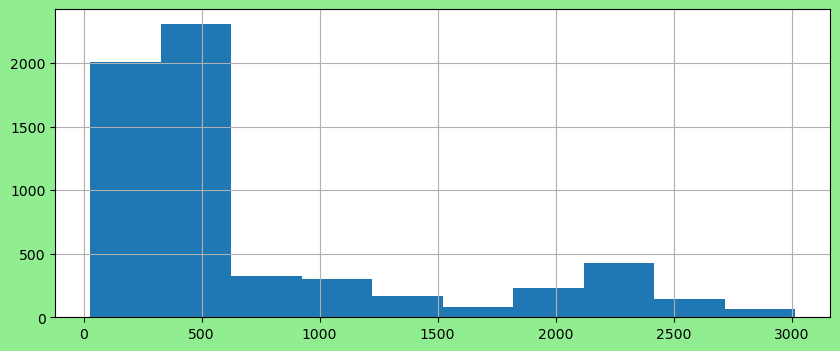

In [13]:
plt.figure(figsize=(10,4),facecolor='lightgreen')
y.hist()


# Moving average 


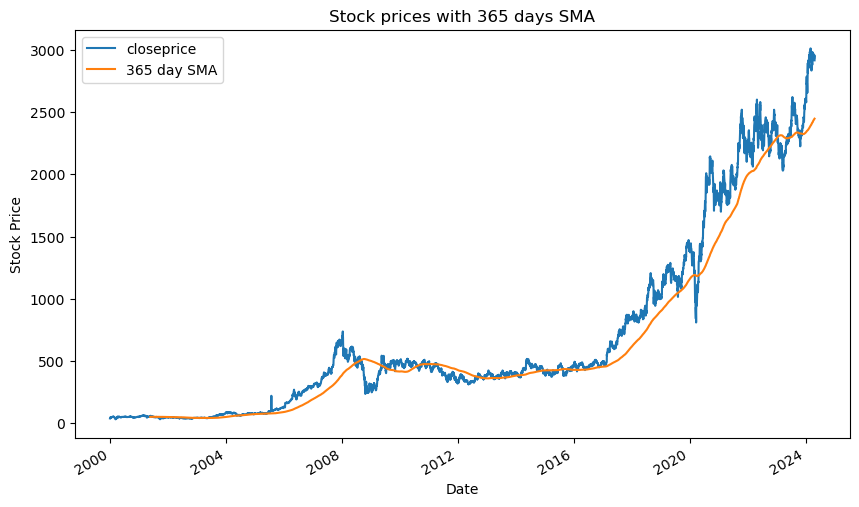

In [14]:
for i in range(1,365):
    y.rolling(i).mean()


MA=y.rolling(window=i).mean()


plt.title('Stock prices with 365 days SMA')
y.plot(figsize=(10,6),label='closeprice')
MA.plot(figsize=(10,6),label='365 day SMA')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

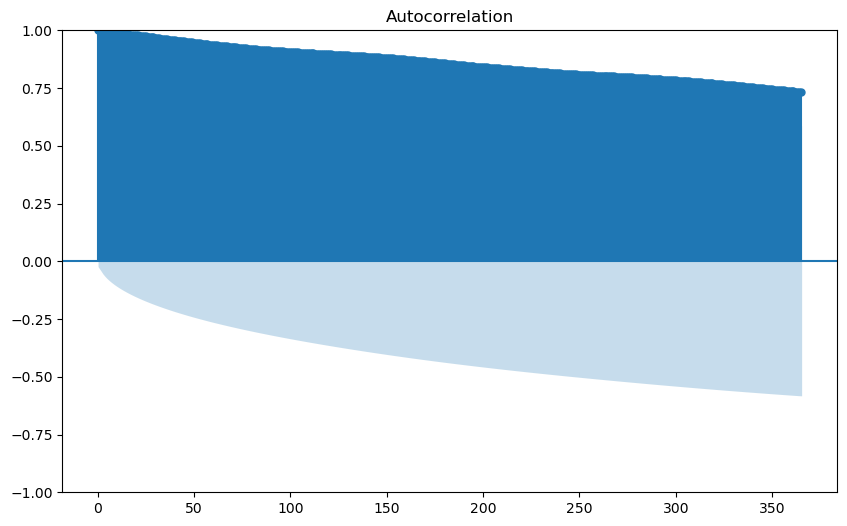

In [15]:
import statsmodels.graphics.tsaplots as tsa_plots
with plt.rc_context():
    plt.rc("figure", figsize=(10,6))
    tsa_plots.plot_acf(y,lags=365)
    plt.show()

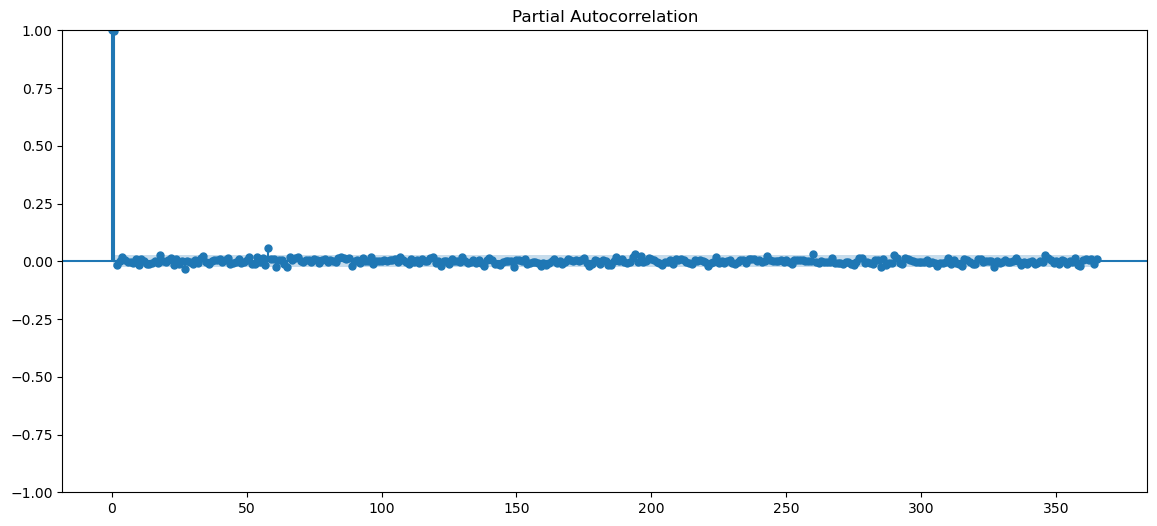

In [16]:
import statsmodels.graphics.tsaplots as tsa_plots
with plt.rc_context():
    plt.rc("figure", figsize=(14,6))
    tsa_plots.plot_pacf(y,lags=365)
    plt.show()

### Appyling ADF test to check whether the data is statiinary or not

In [17]:
from statsmodels.tsa.stattools import adfuller
result=adfuller(y)
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])


ADF Statistic: 1.5098879476645073
p-value: 0.9975603912697341
Critical Values: {'1%': -3.4314349230402152, '5%': -2.862019436692715, '10%': -2.567025201631423}


as we can the data is non stationary because the p value >0.05

### Using Diffrencing 

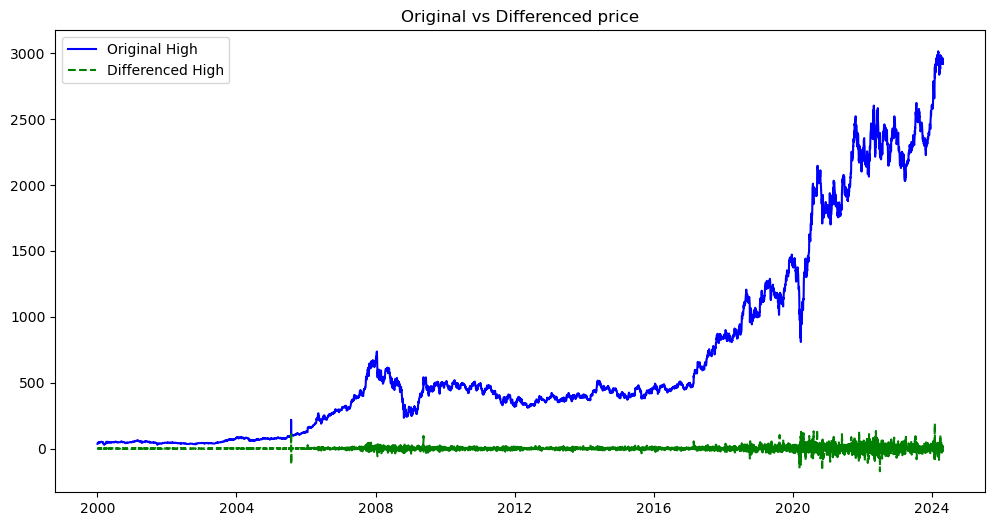

In [18]:
y_diff=y.diff()
plt.figure(figsize=(12, 6))
plt.plot(y, label='Original High', color='blue')
plt.plot(y_diff, label='Differenced High', linestyle='--', color='green')
plt.legend()
plt.title('Original vs Differenced price')
plt.show()

In [19]:
df_combined = pd.concat([y, y_diff], axis=1)

# Display the combined DataFrame
print(df_combined.head())

                Close     Close
Date                           
2000-01-03  35.945827       NaN
2000-01-04  38.823490  2.877663
2000-01-05  40.344440  1.520950
2000-01-06  42.036766  1.692326
2000-01-07  44.921570  2.884804


Hence, the 'close' column represents the differences between consecutive closing values .The first value of close_diff is NaN because there is no previous value to calculate the difference.

As, there is a NaN value we will drop that proceed with our test,Hence, the close_diff column represents the differences between consecutive closing values .The first value of close_diff is NaN because there is no previous value to calculate the difference.

As, there is a NaN value we will drop that proceed with our test,

In [20]:
# Remove rows with missing values
y_diff.dropna(inplace=True)
y_diff.head()

Date
2000-01-04    2.877663
2000-01-05    1.520950
2000-01-06    1.692326
2000-01-07    2.884804
2000-01-10   -0.864014
Name: Close, dtype: float64

In [21]:
# Assuming df is your DataFrame
result = adfuller(y_diff)
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

ADF Statistic: -13.218031365158808
p-value: 1.0150470006624248e-24
Critical Values: {'1%': -3.4314349230402152, '5%': -2.862019436692715, '10%': -2.567025201631423}


1. Based on the ADF Statistici.e < all Critical Values, 
2. So, we reject the null hypothesis and conclude that we have enough evidence to reject the null hypothesis. The data appear to be stationary according to the Augmented Dickey-Fuller test.
3. This suggests that differencing or other transformations may be needed to achieve stationarity before applying certain time series models.

# Decomposition Plot

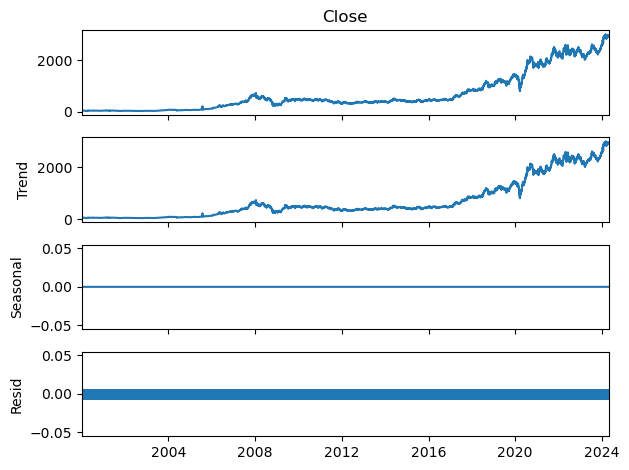

In [22]:
from statsmodels.tsa.seasonal import seasonal_decompose 
decompose_result=seasonal_decompose(y,model='Additive',period=1)
decompose_result.plot()
plt.show()

In [23]:
train=y.loc[:'2022-04-23']
print(train.shape)
train

(5572,)


Date
2000-01-03      35.945827
2000-01-04      38.823490
2000-01-05      40.344440
2000-01-06      42.036766
2000-01-07      44.921570
                 ...     
2022-04-18    2347.972656
2022-04-19    2437.457520
2022-04-20    2509.128418
2022-04-21    2567.877441
2022-04-22    2546.371582
Name: Close, Length: 5572, dtype: float64

In [24]:
test=y.loc['2022-04-24':]
print(test.shape)
test

(493,)


Date
2022-04-25    2487.484131
2022-04-26    2561.924072
2022-04-27    2564.416260
2022-04-28    2602.720703
2022-04-29    2575.399902
                 ...     
2024-04-16    2931.500000
2024-04-18    2928.649902
2024-04-19    2940.250000
2024-04-22    2959.699951
2024-04-23    2918.649902
Name: Close, Length: 493, dtype: float64

In [25]:
import numpy as np
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

## Exponential Methods
### Simple Exponential Method
### Using Forecast Attribute

In [26]:
ses_model = SimpleExpSmoothing(train).fit(optimized=True)
test_pred_ses = ses_model.forecast(493)
train_pred_ses = ses_model.fittedvalues
test_rmse_ses = sqrt(mean_squared_error(test_pred_ses,test))
train_rmse_ses = sqrt(mean_squared_error(train_pred_ses,train))
mape_ses = MAPE(test_pred_ses,test)
print('Simple Exponential Method Evaluation',"\n",\
'Mean Absolute Percent Error   = {}'.format(mape_ses),"\n",\
'Train Root Mean Squared Error = {}'.format(train_rmse_ses),"\n",
'Test Root Mean Squared Error  = {}'.format(test_rmse_ses))

Simple Exponential Method Evaluation 
 Mean Absolute Percent Error   = nan 
 Train Root Mean Squared Error = 14.738431247045218 
 Test Root Mean Squared Error  = 256.9911588461526


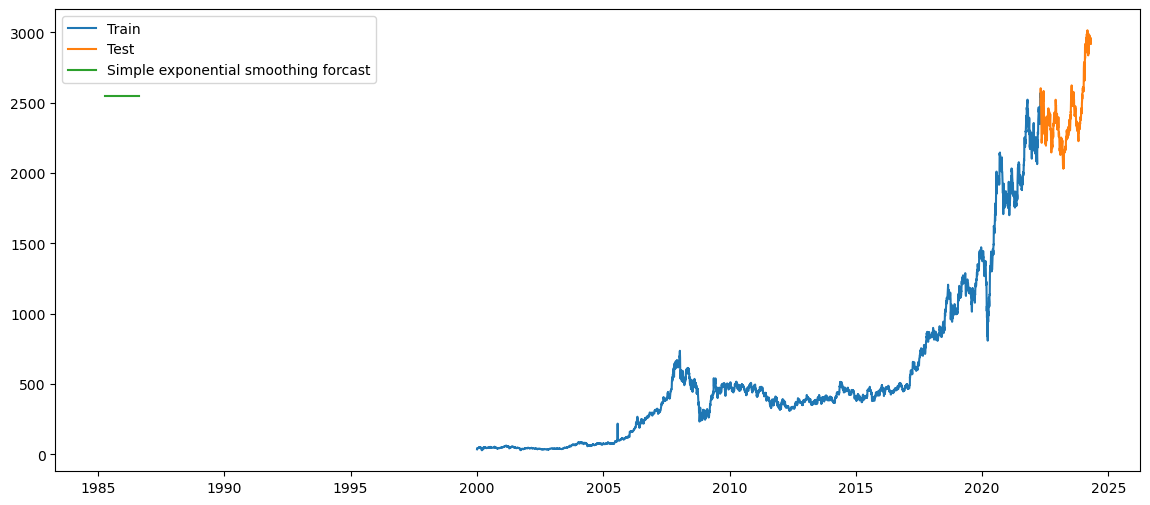

In [27]:
plt.figure(figsize=(14,6))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(test_pred_ses, label='Simple exponential smoothing forcast')
plt.legend(loc='best')
plt.show()

### Observation
1. No seasonality captures.
2. Most recent observation gets higher weightages than the older ones for forecasting.

### Holt method (Double Exponential)
#### Captures both Level and Trend .

In [28]:
dexp_model  = Holt(train).fit(optimized=True)
test_pred_dexp = dexp_model.forecast(493)
train_pred_dexp = dexp_model.fittedvalues
test_rmse_dexp = sqrt(mean_squared_error(test_pred_dexp,test))
train_rmse_dexp = sqrt(mean_squared_error(train_pred_dexp,train))
mape_dexp = MAPE(test_pred_dexp,test)
print('Simple Exponential Method Evaluation',"\n",\
'Mean Absolute Percent Error   = {}'.format(mape_dexp),"\n",\
'Train Root Mean Squared Error = {}'.format(train_rmse_dexp),"\n",
'Test Root Mean Squared Error  = {}'.format(test_rmse_dexp))

Simple Exponential Method Evaluation 
 Mean Absolute Percent Error   = nan 
 Train Root Mean Squared Error = 14.820828049459555 
 Test Root Mean Squared Error  = 1774.387576401421


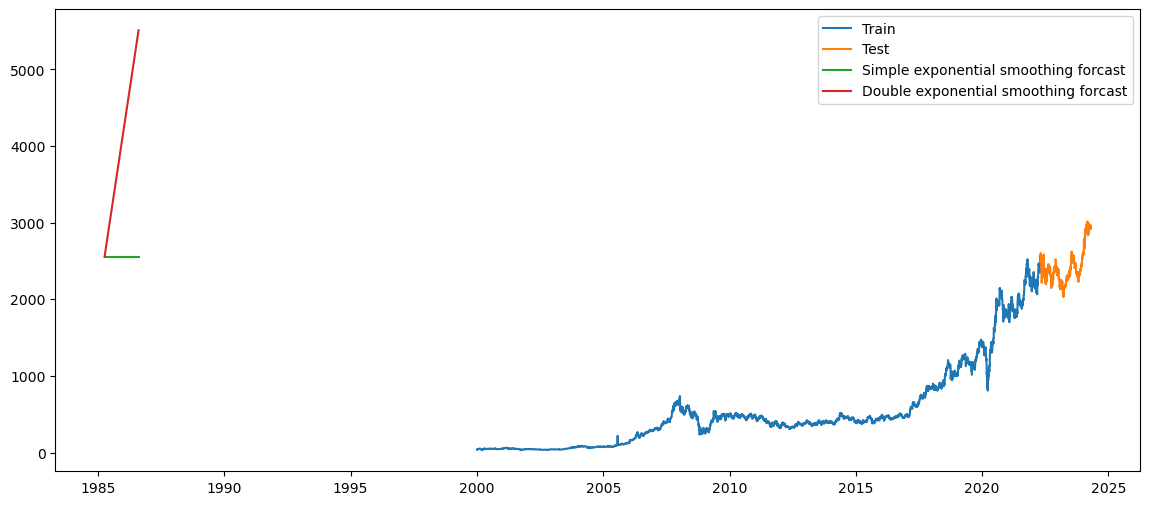

In [29]:
plt.figure(figsize=(14,6))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(test_pred_ses, label='Simple exponential smoothing forcast')
plt.plot(test_pred_dexp, label='Double exponential smoothing forcast')
plt.legend(loc='best')
plt.show()

### Observation
1. We can see that were not able to capture the trend of the data.
2. We were not able to capture the seasonality.

### Holts winter exponential smoothing with additive seasonality and trend (Triple Exponential)
#### Captures Level, Trend and Seasonality.

In [30]:
texp_add_model  = ExponentialSmoothing(train,seasonal="add",trend="add",seasonal_periods=12).fit(optimized=True)
test_pred_ad_texp = texp_add_model.forecast(493)
train_pred_ad_texp = texp_add_model.fittedvalues
test_rmse_ad_texp = sqrt(mean_squared_error(test_pred_ad_texp,test))
train_rmse_ad_texp = sqrt(mean_squared_error(train_pred_ad_texp,train))
mape_ad_texp = MAPE(test_pred_ad_texp,test)
print('Triple Exponential with Additive Trend and Seosonality Method Evaluation',"\n",\
'Mean Absolute Percent Error   = {}'.format(mape_ad_texp),"\n",\
'Train Root Mean Squared Error = {}'.format(train_rmse_ad_texp),"\n",
'Test Root Mean Squared Error  = {}'.format(test_rmse_ad_texp))

Triple Exponential with Additive Trend and Seosonality Method Evaluation 
 Mean Absolute Percent Error   = nan 
 Train Root Mean Squared Error = 14.737203107928643 
 Test Root Mean Squared Error  = 545.9780494174793


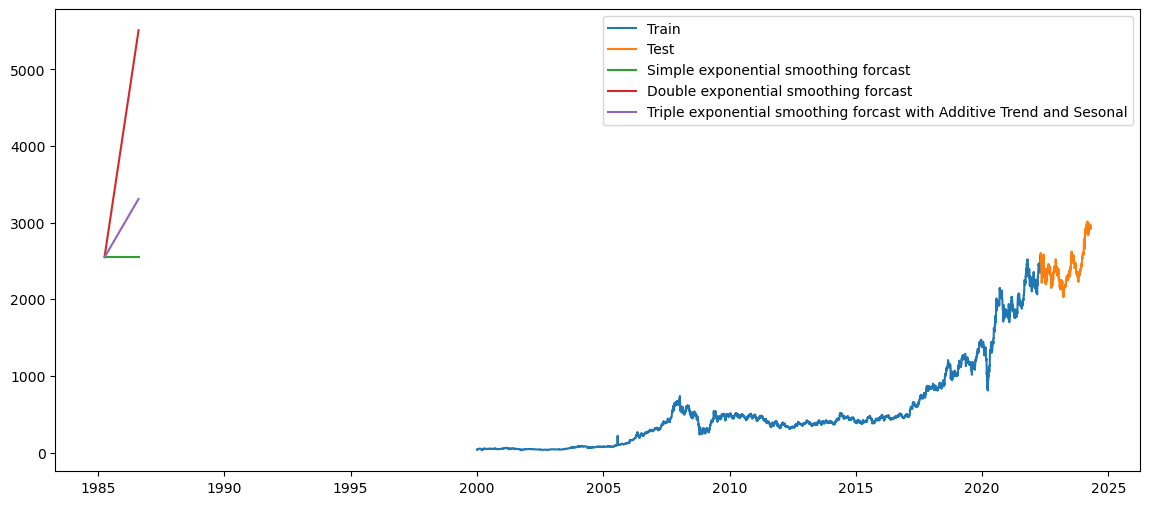

In [31]:
plt.figure(figsize=(14,6))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(test_pred_ses, label='Simple exponential smoothing forcast')
plt.plot(test_pred_dexp, label='Double exponential smoothing forcast')
plt.plot(test_pred_ad_texp, label='Triple exponential smoothing forcast with Additive Trend and Sesonal')
plt.legend(loc='best')
plt.show()

### Observation
1. It does'nt captures the trend.
2. It  also does'nt captures the seasonality.


### Holts winter exponential smoothing with multiplicative seasonality and additive trend (Triple Exponential)

In [32]:
texp_mul_ad_model  = ExponentialSmoothing(train,seasonal="mul",trend="add",seasonal_periods=12).fit(optimized=True)
test_pred_mul_ad_texp = texp_mul_ad_model.forecast(493)
train_pred_mul_ad_texp = texp_mul_ad_model.fittedvalues
test_rmse_mul_ad_texp = sqrt(mean_squared_error(test_pred_mul_ad_texp,test))
train_rmse_mul_ad_texp = sqrt(mean_squared_error(train_pred_mul_ad_texp,train))
mape_mul_ad_texp = MAPE(test_pred_mul_ad_texp,test)
print('Triple Exponential Method with Multiplicative Seasonality and Additive Trend',"\n",\
'Mean Absolute Percent Error   = {}'.format(mape_mul_ad_texp),"\n",\
'Train Root Mean Squared Error = {}'.format(train_rmse_mul_ad_texp),"\n",
'Test Root Mean Squared Error  = {}'.format(test_rmse_mul_ad_texp))

Triple Exponential Method with Multiplicative Seasonality and Additive Trend 
 Mean Absolute Percent Error   = nan 
 Train Root Mean Squared Error = 14.87230572296453 
 Test Root Mean Squared Error  = 311.0202966859615


<function matplotlib.pyplot.show(close=None, block=None)>

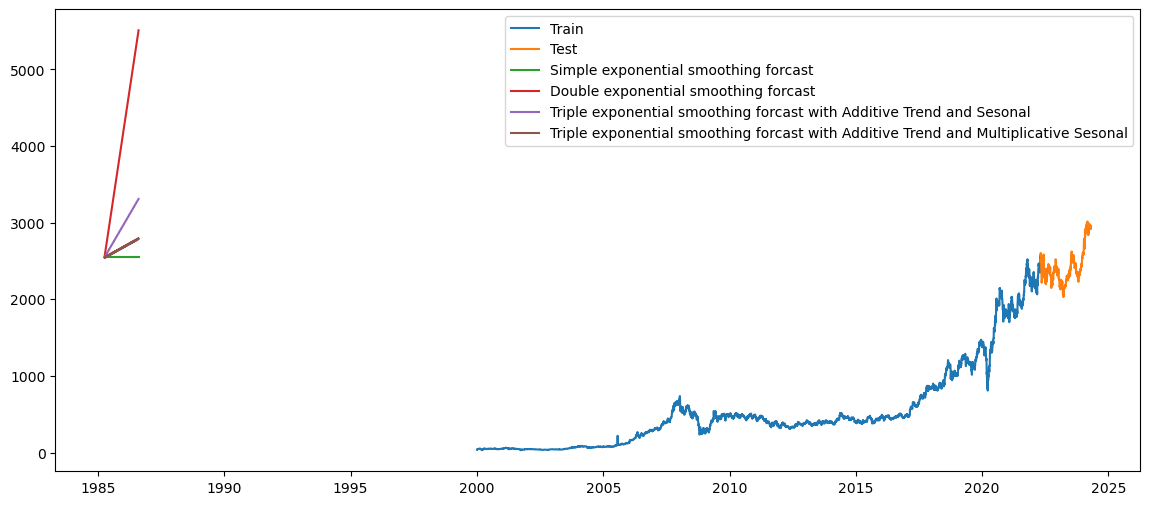

In [33]:
plt.figure(figsize=(14,6))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(test_pred_ses, label='Simple exponential smoothing forcast')
plt.plot(test_pred_dexp, label='Double exponential smoothing forcast')
plt.plot(test_pred_ad_texp, label='Triple exponential smoothing forcast with Additive Trend and Sesonal')
plt.plot(test_pred_mul_ad_texp, label='Triple exponential smoothing forcast with Additive Trend and Multiplicative Sesonal')
plt.legend(loc='best')
plt.show

### Observation
1. We can see that we cannot capture the trend and seasonality with this method also 

### Holts winter exponential smoothing with Additive seasonality and multiplicative trend (Triple Exponential)

In [34]:
texp_ad_mul_model = ExponentialSmoothing(train,seasonal="add",trend="mul",
                    seasonal_periods=12).fit(smoothing_level=0.1, smoothing_slope=0.5)
test_pred_ad_mul_texp  = texp_ad_mul_model.forecast(493)
train_pred_ad_mul_texp  = texp_ad_mul_model.fittedvalues
test_rmse_ad_mul_texp  = sqrt(mean_squared_error(test_pred_ad_mul_texp ,test))
train_rmse_ad_mul_texp  = sqrt(mean_squared_error(train_pred_ad_mul_texp ,train))
mape_ad_mul_texp  = MAPE(test_pred_ad_mul_texp,test)
print('Triple Exponential Method with Additive Seasonality and Multiplicative Trend',"\n",\
'Mean Absolute Percent Error   = {}'.format(mape_ad_mul_texp ),"\n",\
'Train Root Mean Squared Error = {}'.format(train_rmse_ad_mul_texp ),"\n",
'Test Root Mean Squared Error  = {}'.format(test_rmse_ad_mul_texp ))

Triple Exponential Method with Additive Seasonality and Multiplicative Trend 
 Mean Absolute Percent Error   = nan 
 Train Root Mean Squared Error = 32.151814208196626 
 Test Root Mean Squared Error  = 1222.9466419767762


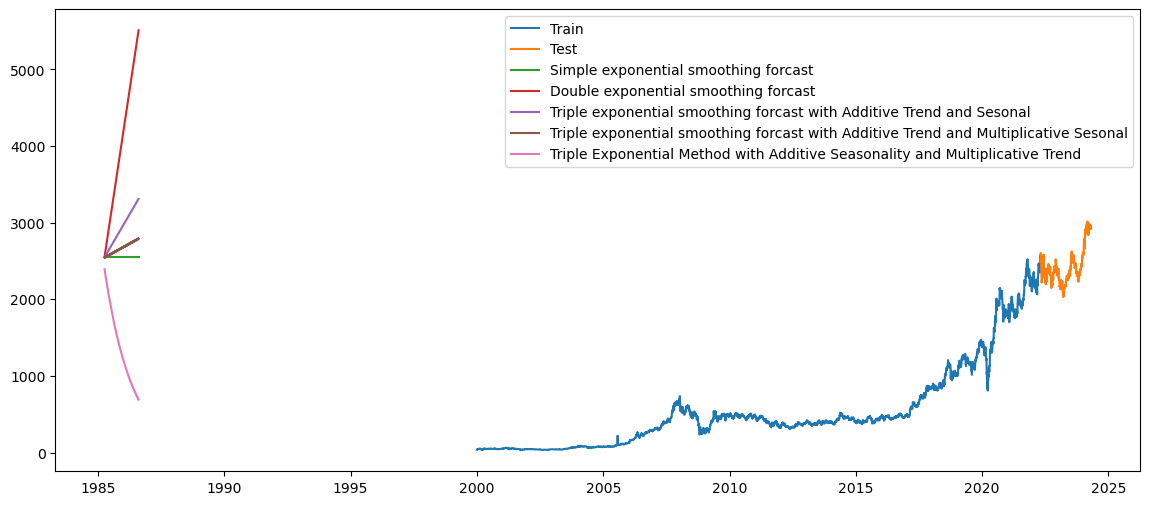

In [35]:
plt.figure(figsize=(14,6))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(test_pred_ses, label='Simple exponential smoothing forcast')
plt.plot(test_pred_dexp, label='Double exponential smoothing forcast')
plt.plot(test_pred_ad_texp, label='Triple exponential smoothing forcast with Additive Trend and Sesonal')
plt.plot(test_pred_mul_ad_texp, label='Triple exponential smoothing forcast with Additive Trend and Multiplicative Sesonal')
plt.plot(test_pred_ad_mul_texp, label='Triple Exponential Method with Additive Seasonality and Multiplicative Trend')
plt.legend(loc='best')
plt.show()

### Observation
1. We can see that the result is same as the above models


### Holts winter exponential smoothing with multiplicative seasonality and multiplicative trend (Triple Exponential)

In [36]:
texp_mul_model  = ExponentialSmoothing(train,seasonal="mul",trend="mul",seasonal_periods=12).fit(optimized=True)
test_pred_mul_texp  = texp_mul_model.forecast(493)
train_pred_mul_texp  = texp_mul_model.fittedvalues
test_rmse_mul_texp  = sqrt(mean_squared_error(test_pred_mul_texp ,test))
train_rmse_mul_texp  = sqrt(mean_squared_error(train_pred_mul_texp ,train))
mape_mul_texp  = MAPE(test_pred_mul_texp,test)
print('Triple Exponential Method with multiplicative Trend and Seasonality',"\n",\
'Mean Absolute Percent Error   = {}'.format(mape_mul_texp ),"\n",\
'Train Root Mean Squared Error = {}'.format(train_rmse_mul_texp ),"\n",
'Test Root Mean Squared Error  = {}'.format(test_rmse_mul_texp ))

Triple Exponential Method with multiplicative Trend and Seasonality 
 Mean Absolute Percent Error   = nan 
 Train Root Mean Squared Error = 15.00136798992053 
 Test Root Mean Squared Error  = 5040.421607485291


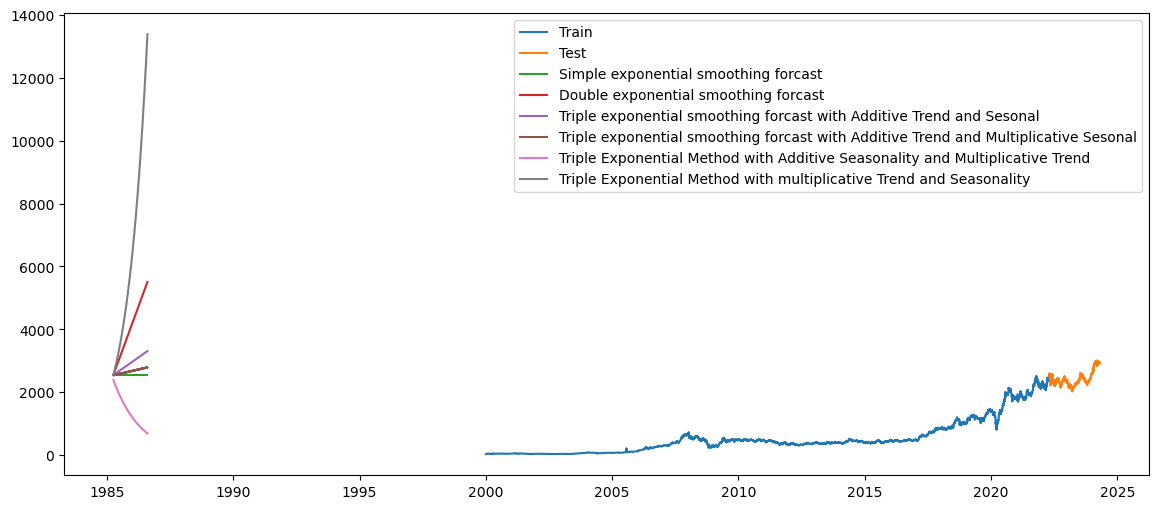

In [37]:
plt.figure(figsize=(14,6))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(test_pred_ses, label='Simple exponential smoothing forcast')
plt.plot(test_pred_dexp, label='Double exponential smoothing forcast')
plt.plot(test_pred_ad_texp, label='Triple exponential smoothing forcast with Additive Trend and Sesonal')
plt.plot(test_pred_mul_ad_texp, label='Triple exponential smoothing forcast with Additive Trend and Multiplicative Sesonal')
plt.plot(test_pred_ad_mul_texp, label='Triple Exponential Method with Additive Seasonality and Multiplicative Trend')
plt.plot(test_pred_mul_texp, label='Triple Exponential Method with multiplicative Trend and Seasonality')
plt.legend(loc='best')
plt.show()

### ARIMA 

In [38]:
model = ARIMA(train, order=(4, 1, 1))
arima_model = model.fit()

In [39]:
# Forecast the stock prices for the test set
forecast = arima_model.forecast(steps=len(test))

RMSE: 251.6567492655135


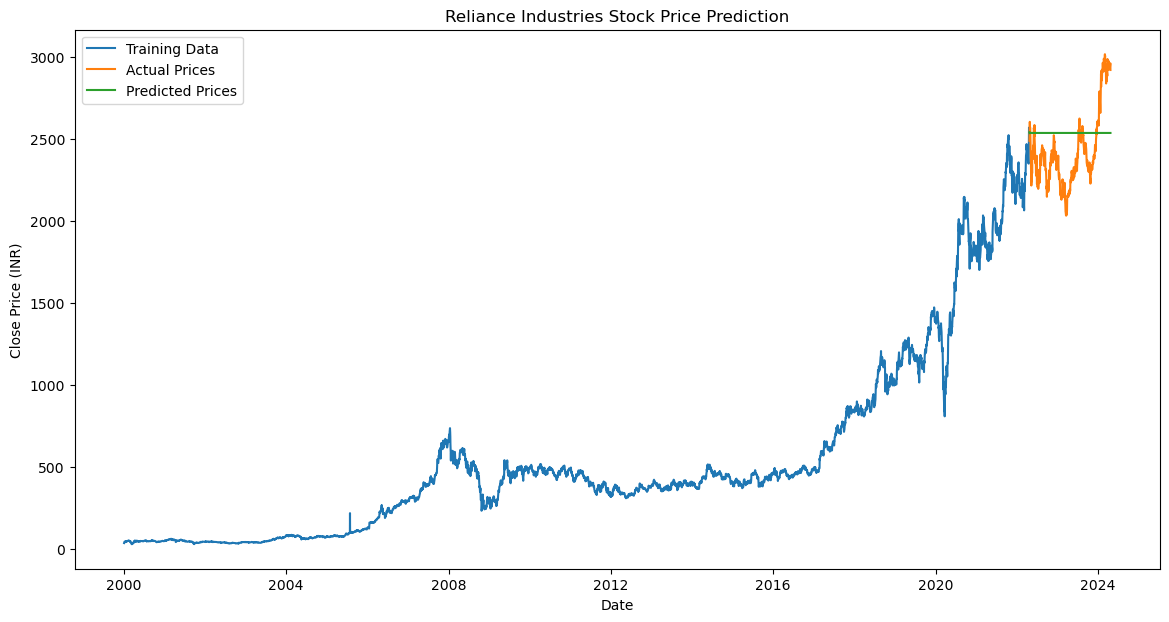

In [40]:
# Calculate the RMSE
rmse_arima= np.sqrt(mean_squared_error(test, forecast))
print(f'RMSE: {rmse_arima}')

# Plot the actual vs. predicted prices
plt.figure(figsize=(14, 7))
plt.plot(train, label='Training Data')
plt.plot(test, label='Actual Prices')
plt.plot(test.index, forecast, label='Predicted Prices')
plt.title('Reliance Industries Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Close Price (INR)')
plt.legend()
plt.show()

## Observation
1. We somehow managed to capture the trend but not so accurately 

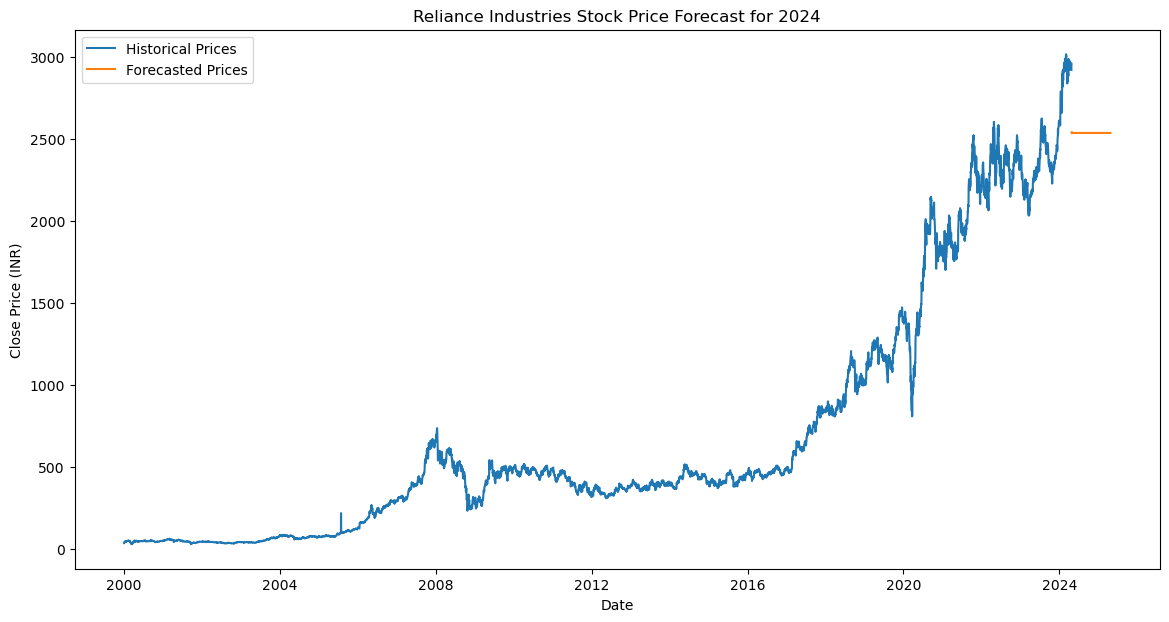

In [41]:
# Forecast the stock price for the next year (2024)
future_forecast = arima_model.forecast(steps=365)

# Plot the forecasted prices
plt.figure(figsize=(14, 7))
plt.plot(close_price['Close'], label='Historical Prices')
plt.plot(pd.date_range(start='2024-04-25', periods=365, freq='D'), future_forecast, label='Forecasted Prices')
plt.title('Reliance Industries Stock Price Forecast for 2024')
plt.xlabel('Date')
plt.ylabel('Close Price (INR)')
plt.legend()
plt.show()

## Using the LSTM Model 


### Preparing the data for the LSTM model

In [42]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
# Scale the data to the range (0, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(close_price)

# Split the data into training and test sets
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

# Create a function to prepare the data for the LSTM model
def create_dataset(data, time_step=1):
    X, Y = [], []
    for i in range(len(data) - time_step):
        a = data[i:(i + time_step), 0]
        X.append(a)
        Y.append(data[i + time_step, 0])
    return np.array(X), np.array(Y)

# Prepare the data with a time step of 100
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [43]:
# Reshape the input to be [samples, time steps, features] as required by LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

## Fitting the model 

In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, batch_size=1, epochs=1)





4752/4752 [==============================] - 182s 38ms/step - loss: 1.2459e-04


35/35 [==============================] - 3s 29ms/step


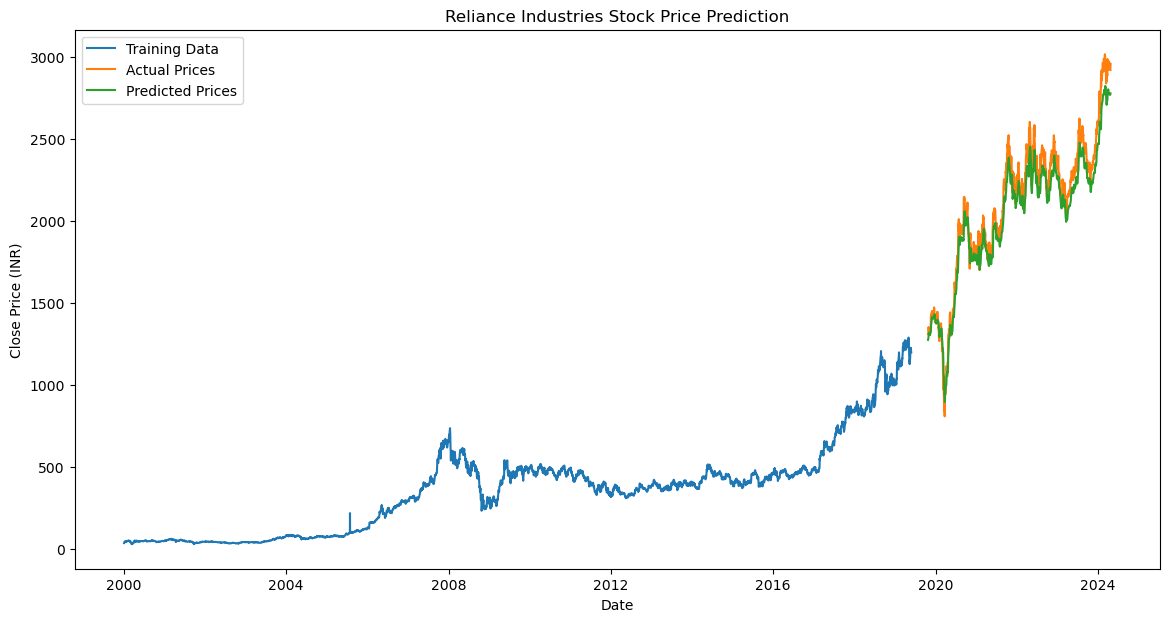

In [46]:
# Predict the stock prices using the test data
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

# Create a dataframe to compare the actual vs. predicted prices
train = close_price[:train_size]
valid = close_price[train_size + time_step:]
valid['Predictions'] = predictions

# Plot the actual vs. predicted prices
plt.figure(figsize=(14, 7))
plt.plot(train['Close'], label='Training Data')
plt.plot(valid['Close'], label='Actual Prices')
plt.plot(valid['Predictions'], label='Predicted Prices')
plt.title('Reliance Industries Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Close Price (INR)')
plt.legend()
plt.show()


### Observation 
1. We were able to capture the trend .
2. We were also able to capture the seasonality,very well.
3. The forecasted price are little bit lower from the actual price, but there's not significant difference.

In [47]:
# Forecast future prices
def forecast_next_days(model, data, time_step, n_days):
    temp_input = list(data[-time_step:])
    output = []
    for _ in range(n_days):
        if len(temp_input) > time_step:
            temp_input = temp_input[1:]
        input_data = np.array(temp_input).reshape(1, time_step, 1)
        prediction = model.predict(input_data)
        output.append(prediction[0, 0])
        temp_input.append(prediction[0, 0])
    return np.array(output)




In [48]:
# Verify the shapes
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (4752, 100, 1)
y_train shape: (4752,)
X_test shape: (1113, 100, 1)
y_test shape: (1113,)


1/1 [==============================] - 0s 30ms/step


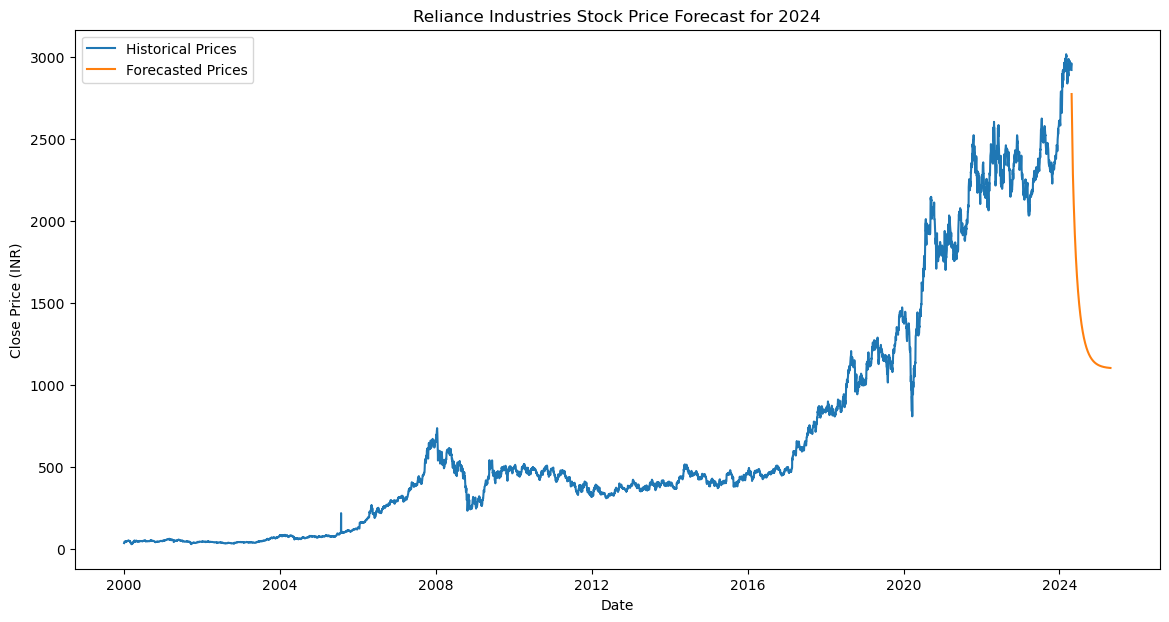

In [49]:

# Correct the forecast function
def forecast_next_days(model, data, time_step, n_days):
    temp_input = list(data[-time_step:].flatten())
    output = []
    for _ in range(n_days):
        if len(temp_input) > time_step:
            temp_input = temp_input[1:]
        input_data = np.array(temp_input).reshape(1, time_step, 1)
        prediction = model.predict(input_data)
        output.append(prediction[0, 0])
        temp_input.append(prediction[0, 0])
    return np.array(output)

# Forecast for the next year (365 days)
n_days = 365
forecasted_prices = forecast_next_days(model, scaled_data, time_step, n_days)
forecasted_prices = scaler.inverse_transform(forecasted_prices.reshape(-1, 1))

# Generate the dates for the forecasted period
forecast_dates = pd.date_range(start=close_price.index[-1] + pd.Timedelta(days=1), periods=n_days, freq='D')

# Create a new DataFrame for the forecasted prices
forecast_df = pd.DataFrame(forecasted_prices, index=forecast_dates, columns=['Forecasted Close'])

# Plot the forecasted prices along with the historical data
plt.figure(figsize=(14, 7))
plt.plot(close_price['Close'], label='Historical Prices')
plt.plot(forecast_df['Forecasted Close'], label='Forecasted Prices')
plt.title('Reliance Industries Stock Price Forecast for 2024')
plt.xlabel('Date')
plt.ylabel('Close Price (INR)')
plt.legend()
plt.show()


## Observation 
1. As we can see that the forecasted prices are following the downward trend and declining day-by-day 
2. This model performed well on the training data but could'nt forecasted the prices accurately.

### Again we are training the model by increasing the number of epochs 

In [56]:
model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_test, y_test))


Epoch 1/10
149/149 [==============================] - 11s 75ms/step - loss: 1.4652e-05 - val_loss: 7.1002e-04
Epoch 2/10
149/149 [==============================] - 10s 65ms/step - loss: 1.4502e-05 - val_loss: 2.2033e-04
Epoch 3/10
149/149 [==============================] - 9s 64ms/step - loss: 1.4178e-05 - val_loss: 2.1973e-04
Epoch 4/10
149/149 [==============================] - 10s 65ms/step - loss: 1.3205e-05 - val_loss: 2.1203e-04
Epoch 5/10
149/149 [==============================] - 10s 65ms/step - loss: 1.2791e-05 - val_loss: 2.7849e-04
Epoch 6/10
149/149 [==============================] - 10s 66ms/step - loss: 1.2447e-05 - val_loss: 1.5228e-04
Epoch 7/10
149/149 [==============================] - 10s 66ms/step - loss: 1.1967e-05 - val_loss: 2.5311e-04
Epoch 8/10
149/149 [==============================] - 10s 66ms/step - loss: 1.1742e-05 - val_loss: 1.8709e-04
Epoch 9/10
149/149 [==============================] - 10s 66ms/step - loss: 1.1937e-05 - val_loss: 1.8093e-04
Epoch 10/10

1/1 [==============================] - 0s 34ms/step


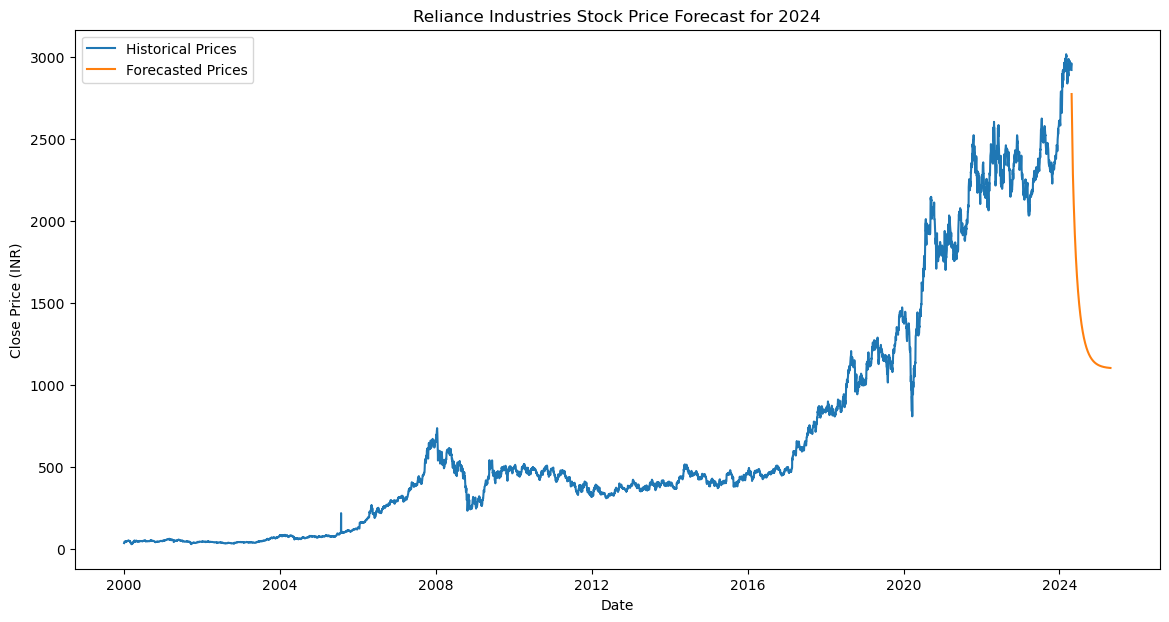

In [57]:
def forecast_next_days(model, data, time_step, n_days):
    temp_input = list(data[-time_step:].flatten())
    output = []
    for _ in range(n_days):
        if len(temp_input) > time_step:
            temp_input = temp_input[1:]
        input_data = np.array(temp_input).reshape(1, time_step, 1)
        prediction = model.predict(input_data)
        output.append(prediction[0, 0])
        temp_input.append(prediction[0, 0])
    return np.array(output)

# Forecast for the next year (365 days)
n_days = 365
forecasted_prices = forecast_next_days(model, scaled_data, time_step=100, n_days=n_days)
forecasted_prices = scaler.inverse_transform(forecasted_prices.reshape(-1, 1))

# Generate the dates for the forecasted period
forecast_dates = pd.date_range(start=close_price.index[-1] + pd.Timedelta(days=1), periods=n_days, freq='D')

# Create a new DataFrame for the forecasted prices
forecast_df2 = pd.DataFrame(forecasted_prices, index=forecast_dates, columns=['Forecasted Close'])

# Plot the forecasted prices along with the historical data
plt.figure(figsize=(14, 7))
plt.plot(close_price['Close'], label='Historical Prices')
plt.plot(forecast_df['Forecasted Close'], label='Forecasted Prices')
plt.title('Reliance Industries Stock Price Forecast for 2024')
plt.xlabel('Date')
plt.ylabel('Close Price (INR)')
plt.legend()
plt.show()


# Observation 

####  As we can see after making the changes the model forecasted the price very well.

In [58]:
forecast_df2

,Forecasted Close
2024-04-24,2864.027588
2024-04-25,2796.929199
2024-04-26,2729.775879
2024-04-27,2672.054443
2024-04-28,2628.336670
...,...
2025-04-19,1073.308594
2025-04-20,1071.800049
2025-04-21,1070.293579
2025-04-22,1068.788696


In [59]:
# Predict the stock prices using the test data
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

# Calculate RMSE
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))
rmse = np.sqrt(np.mean((predictions - y_test_scaled) ** 2))
print(f'RMSE: {rmse}')

35/35 [==============================] - 1s 29ms/step
RMSE: 42.15789505288862


In [60]:
Evaluation = {"Models":pd.Series(["Simple_Exp","Double_Exp","Triple_Exp_Add","Triple_Exp_Mul_Add","Triple_Exp_Add_Mul","Triple_Exp_Mul",'ARIMA','LSTM']),
        "Test_RMSE_Values":pd.Series([test_rmse_ses,test_rmse_dexp,test_rmse_ad_texp,test_rmse_mul_ad_texp,test_rmse_ad_mul_texp,test_rmse_mul_texp,rmse_arima,rmse])}
table_evaluation = pd.DataFrame(Evaluation)
table_evaluation

,Models,Test_RMSE_Values
0,Simple_Exp,256.991159
1,Double_Exp,1774.387576
2,Triple_Exp_Add,545.978049
3,Triple_Exp_Mul_Add,311.020297
4,Triple_Exp_Add_Mul,1222.946642
5,Triple_Exp_Mul,5040.421607
6,ARIMA,251.656749
7,LSTM,42.157895


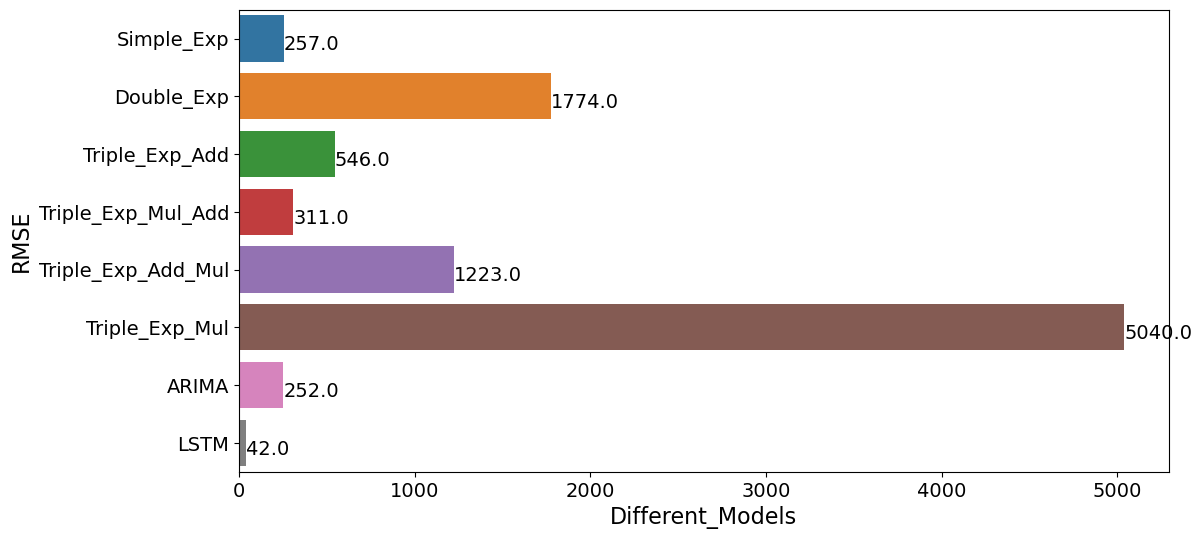

In [61]:
f, axe = plt.subplots(1,1, figsize=(12,6))
sns.barplot(x= 'Test_RMSE_Values', y= 'Models', data= table_evaluation, ax= axe)
axe.set_xlabel('Different_Models', size=16)
axe.set_ylabel('RMSE', size=16)
plt.yticks(fontsize= 14)
plt.xticks(fontsize= 14)

for i, v in enumerate(np.round(table_evaluation.Test_RMSE_Values.values,0)):
    axe.text(v + 1, i + .20, str(v),
            color = 'black', fontsize= 14)
plt.show()

## Conclusion:

### LSTM Model

### The best model we have got so far with the lowest RMSE .

# THE END !!!